In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem 

mousedrugcsv = "data/mouse_drug_data.csv"
clinicaltrialcsv = "data/clinicaltrial_data.csv"

mousedrugdata = pd.read_csv(mousedrugcsv)
clinicaldata = pd.read_csv(clinicaltrialcsv)
mousedrugdata.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
clinicaldata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
mouseclinicaldf = pd.merge(mousedrugdata, clinicaldata, how='left', on=["Mouse ID", "Mouse ID"])
mouseclinicaldf.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [8]:
mouseclinicaldf.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [9]:
mouseclinicaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


In [10]:
###Tumor response to treatment
tumorvdf = mouseclinicaldf.drop(['Mouse ID', 'Metastatic Sites'], axis=1)\
            .groupby(['Drug','Timepoint'])\
            .mean()\
            .reset_index() 
tumorvdf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
tumorvsedf = mouseclinicaldf.drop(['Mouse ID', 'Metastatic Sites'], axis=1)\
            .groupby(['Drug','Timepoint'])\
            .sem()\
            .reset_index() 
tumorvsedf.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
errorsdf =tumorvsedf.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

In [13]:
tumorvdf.set_index(['Drug','Timepoint']).unstack(level=0)

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [14]:
df = tumorvdf[tumorvdf.Drug == 'Capomulin'].set_index('Timepoint')

In [15]:
col1 = df['Drug'].rename('Capomulin')

In [16]:
col1

Timepoint
0     Capomulin
5     Capomulin
10    Capomulin
15    Capomulin
20    Capomulin
25    Capomulin
30    Capomulin
35    Capomulin
40    Capomulin
45    Capomulin
Name: Capomulin, dtype: object

In [17]:
col2 = tumorvdf[tumorvdf.Drug == 'Ceftamin'].set_index('Timepoint')['Tumor Volume (mm3)'].rename('Ceftamin')

In [18]:
col2

Timepoint
0     45.000000
5     46.503051
10    48.285125
15    50.094055
20    52.157049
25    54.287674
30    56.769517
35    58.827548
40    61.467895
45    64.132421
Name: Ceftamin, dtype: float64

In [19]:
pd.concat([col1,col2],axis=1)

,Capomulin,Ceftamin
Timepoint,,
0,Capomulin,45.000000
5,Capomulin,46.503051
10,Capomulin,48.285125
15,Capomulin,50.094055
20,Capomulin,52.157049
25,Capomulin,54.287674
30,Capomulin,56.769517
35,Capomulin,58.827548
40,Capomulin,61.467895


In [20]:
drugs = tumorvdf["Drug"].unique()

In [21]:
dfs = []
for drug in drugs:
    dfs.append(tumorvdf[tumorvdf.Drug == drug].set_index('Timepoint')['Tumor Volume (mm3)'].rename(drug))

In [22]:
dfv = tumorvdf['Tumor Volume (mm3)']
dfv

0     45.000000
1     44.266086
2     43.084291
3     42.064317
4     40.716325
5     39.939528
6     38.769339
7     37.816839
8     36.958001
9     36.236114
10    45.000000
11    46.503051
12    48.285125
13    50.094055
14    52.157049
15    54.287674
16    56.769517
17    58.827548
18    61.467895
19    64.132421
20    45.000000
21    47.062001
22    49.403909
23    51.296397
24    53.197691
25    55.715252
26    58.299397
27    60.742461
28    63.162824
29    65.755562
        ...    
70    45.000000
71    43.944859
72    42.531957
73    41.495061
74    40.238325
75    38.974300
76    38.703137
77    37.451996
78    36.574081
79    34.955595
80    45.000000
81    47.527452
82    49.463844
83    51.529409
84    54.067395
85    56.166123
86    59.826738
87    62.440699
88    65.356386
89    68.438310
90    45.000000
91    46.851818
92    48.689881
93    50.779059
94    53.170334
95    55.432935
96    57.713531
97    60.089372
98    62.916692
99    65.960888
Name: Tumor Volume (mm3)

In [23]:
drugdf= pd.concat(dfs,axis=1)
drugdf

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


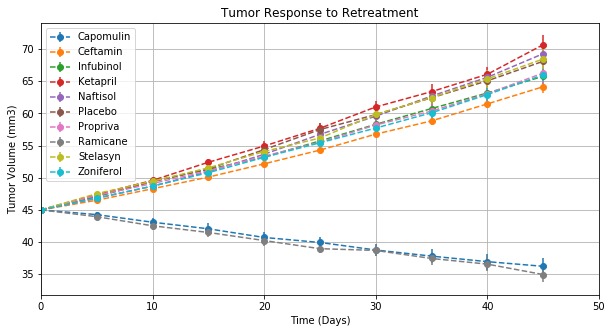

In [24]:
drugdf.plot(yerr=errorsdf, fmt= '--o',figsize=(10,5))
plt.title('Tumor Response to Retreatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.legend(loc="best")
plt.xlim(0,50,10)
plt.grid()

In [25]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metsdf = mouseclinicaldf.drop(['Mouse ID','Tumor Volume (mm3)'], axis=1)\
            .groupby(['Drug','Timepoint'])\
            .mean()\
            .reset_index()
metsdf.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [26]:
metserrdf = mouseclinicaldf.drop(['Mouse ID', 'Tumor Volume (mm3)'], axis = 1)\
            .groupby(['Drug', 'Timepoint'])\
            .sem()\
            .reset_index()
metserrdf.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [27]:
metsmeandf= metsdf.pivot(index= 'Timepoint', columns='Drug', values='Metastatic Sites')
metsmeandf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [28]:
metserrordf =metserrdf.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metserrordf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


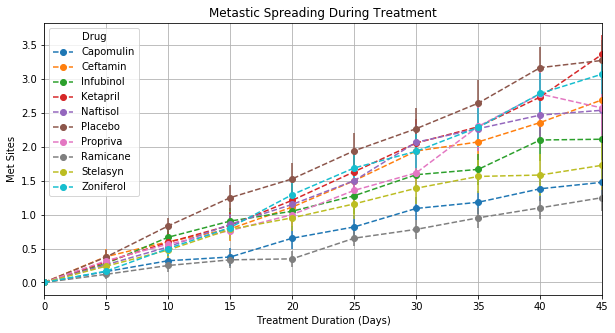

In [29]:
metsmeandf.plot(yerr=metserrordf, fmt="--o", figsize=(10,5))
plt.title('Metastic Spreading During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met Sites')
plt.grid()

In [30]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
micedf = mouseclinicaldf.drop(['Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)\
            .groupby(['Drug','Timepoint'])\
            .count()\
            .reset_index()
micedf.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [31]:
micectdf =micedf.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
micectdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [61]:
micectdf.pct_change(periods = 9)*100

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


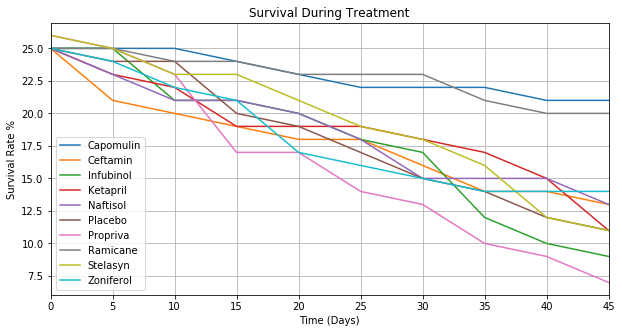

In [40]:
micectdf.plot(figsize=(10,5))
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate %")
plt.xlabel("Time (Days)")
plt.legend(loc='best')
plt.grid()

In [42]:
# Calculate the percent changes for each drug
# Display the data to confirm
drugchgdf = drugdf.pct_change(periods = 9)*100
drugchgdf

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'fig' is not defined

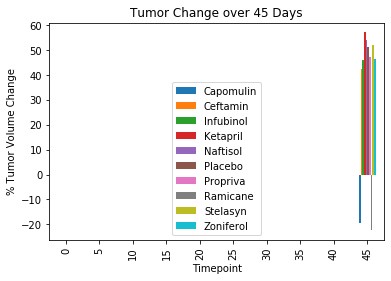

In [62]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure
drugchgdf.plot(kind='bar')
plt.title('Tumor Change over 45 Days')
plt.ylabel('% Tumor Volume Change')

fig.show()